#Import Packages

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

#Show Dataset

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2/11/2016 21:49,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,4/22/2016 2:07,Yes,Pakanbaru,Riau,Electronic
997,997,NaN,51,296910040.0,120.37,Laki-Laki,2/1/2016 17:24,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,3/24/2016 2:35,No,Tangerang,Banten,Bank


In [3]:
# Count the values in the 'Male' column
male_counts = df['Male'].value_counts()

print("Value Counts for 'Male' Column:")
print(male_counts)

Value Counts for 'Male' Column:
Perempuan    518
Laki-Laki    479
Name: Male, dtype: int64


#Cleansing Data

###Check for Duplicate Data


In [4]:
# Check Duplicate
duplicate_rows = df[df.duplicated()]
print("Number of Duplicate:", len(duplicate_rows))
print("Duplicate Rows:")
print(duplicate_rows)

Number of Duplicate: 0
Duplicate Rows:
Empty DataFrame
Columns: [Unnamed: 0, Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Male, Timestamp, Clicked on Ad, city, province, category]
Index: []


In [5]:
# Check missing values
missing_values = df.isnull().sum()
print("Jumlah missing values:")
print(missing_values)

Jumlah missing values:
Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64


In [6]:
# Count the values in the 'Male' column
male_counts = df['Male'].value_counts()

# Determine the most common value ('Laki-Laki' or 'Perempuan')
most_common_male = male_counts.idxmax()

# Fill missing values in 'Male' column with the most common value
df['Male'].fillna(most_common_male, inplace=True)

# Verify the changes
print("Value Counts for 'Male' Column after filling missing values:")
print(df['Male'].value_counts())

Value Counts for 'Male' Column after filling missing values:
Perempuan    521
Laki-Laki    479
Name: Male, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      1000 non-null   object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [8]:
# Change Column "Timestamp" to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Periksa perubahan
print(df['Timestamp'].dtype)

datetime64[ns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  987 non-null    float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               987 non-null    float64       
 4   Daily Internet Usage      989 non-null    float64       
 5   Male                      1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 86.1+ KB


In [10]:
# Calculate median by age group
median_by_age = df.groupby('Age')['Daily Time Spent on Site'].median()

# Fill missing values based on age group median
df['Daily Time Spent on Site'] = df.apply(
    lambda row: median_by_age[row['Age']] if pd.isnull(row['Daily Time Spent on Site']) else row['Daily Time Spent on Site'],
    axis=1
)

# Check if missing values are filled
missing_values_after_fill = df[['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']].isnull().sum()

# Display the data with missing values filled
print(df)

# Display missing values after fill
print("Missing Values After Fill:")
print(missing_values_after_fill)


     Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
997         997                     52.84   51  296910040.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male           Timestamp Clicked on Ad  \
0                  256.09  Perempuan 2016-03-27 00:53:00            No   
1                  193.77  Laki-Laki 2016-04-04 01:39:00            No   
2                  23

In [11]:
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic
997,997,52.84,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank


In [12]:
# Calculate mean for the columns with missing values
mean_values = df[['Area Income', 'Daily Internet Usage']].mean()

# Fill missing values with mean
df[['Area Income', 'Daily Internet Usage']] = df[['Area Income', 'Daily Internet Usage']].fillna(mean_values)

# Check if missing values are filled
missing_values_after_fill = df[['Area Income', 'Daily Internet Usage']].isnull().sum()

# Display the data with missing values filled
print(df)

     Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
997         997                     52.84   51  296910040.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage       Male           Timestamp Clicked on Ad  \
0                  256.09  Perempuan 2016-03-27 00:53:00            No   
1                  193.77  Laki-Laki 2016-04-04 01:39:00            No   
2                  23

In [13]:
# Display missing values after fill
print("Missing Values After Fill:")
print(missing_values_after_fill)

Missing Values After Fill:
Area Income             0
Daily Internet Usage    0
dtype: int64


In [14]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the total missing values in each column
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                1000 non-null   int64         
 1   Daily Time Spent on Site  1000 non-null   float64       
 2   Age                       1000 non-null   int64         
 3   Area Income               1000 non-null   float64       
 4   Daily Internet Usage      1000 non-null   float64       
 5   Male                      1000 non-null   object        
 6   Timestamp                 1000 non-null   datetime64[ns]
 7   Clicked on Ad             1000 non-null   object        
 8   city                      1000 non-null   object        
 9   province                  1000 non-null   object        
 10  category                  1000 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 86.1+ KB


In [16]:
# Feature Encoding
# For example, encoding the "Male" column using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Male'], drop_first=True)
print(df_encoded)

     Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0             0                     68.95   35  432837300.0   
1             1                     80.23   31  479092950.0   
2             2                     69.47   26  418501580.0   
3             3                     74.15   29  383643260.0   
4             4                     68.37   35  517229930.0   
..          ...                       ...  ...          ...   
995         995                     72.97   30  499691990.0   
996         996                     51.30   45  474475190.0   
997         997                     52.84   51  296910040.0   
998         998                     55.55   19  293445530.0   
999         999                     45.01   26  209130600.0   

     Daily Internet Usage           Timestamp Clicked on Ad           city  \
0                  256.09 2016-03-27 00:53:00            No  Jakarta Timur   
1                  193.77 2016-04-04 01:39:00            No       Denpasar   
2        

In [17]:
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance
...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance
996,996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic
997,997,52.84,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel
998,998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank


In [18]:
# Splitting into features and target
X = df_encoded.drop(columns=['Clicked on Ad'])  # Features
y = df_encoded['Clicked on Ad']  # Target

# Extracting time-related columns
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert to datetime
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Week'] = df['Timestamp'].dt.isocalendar().week
df['Day'] = df['Timestamp'].dt.day

# Display the modified data
print(df.head())

   Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0           0                     68.95   35  432837300.0   
1           1                     80.23   31  479092950.0   
2           2                     69.47   26  418501580.0   
3           3                     74.15   29  383643260.0   
4           4                     68.37   35  517229930.0   

   Daily Internet Usage       Male           Timestamp Clicked on Ad  \
0                256.09  Perempuan 2016-03-27 00:53:00            No   
1                193.77  Laki-Laki 2016-04-04 01:39:00            No   
2                236.50  Perempuan 2016-03-13 20:35:00            No   
3                245.89  Laki-Laki 2016-01-10 02:31:00            No   
4                225.58  Perempuan 2016-06-03 03:36:00            No   

            city                       province    category  Year  Month  \
0  Jakarta Timur  Daerah Khusus Ibukota Jakarta   Furniture  2016      3   
1       Denpasar                           Bali 

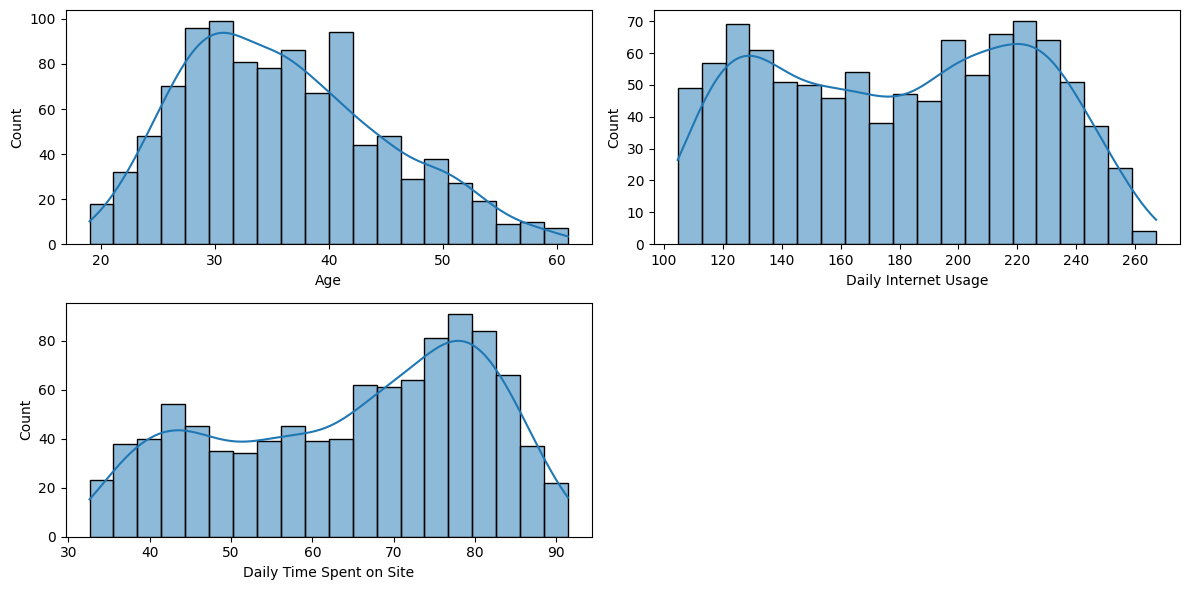

In [19]:
# Univariate Analysis
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.subplot(2, 2, 2)
sns.histplot(df['Daily Internet Usage'], bins=20, kde=True)
plt.subplot(2, 2, 3)
sns.histplot(df['Daily Time Spent on Site'], bins=20, kde=True)
plt.tight_layout()
plt.show()

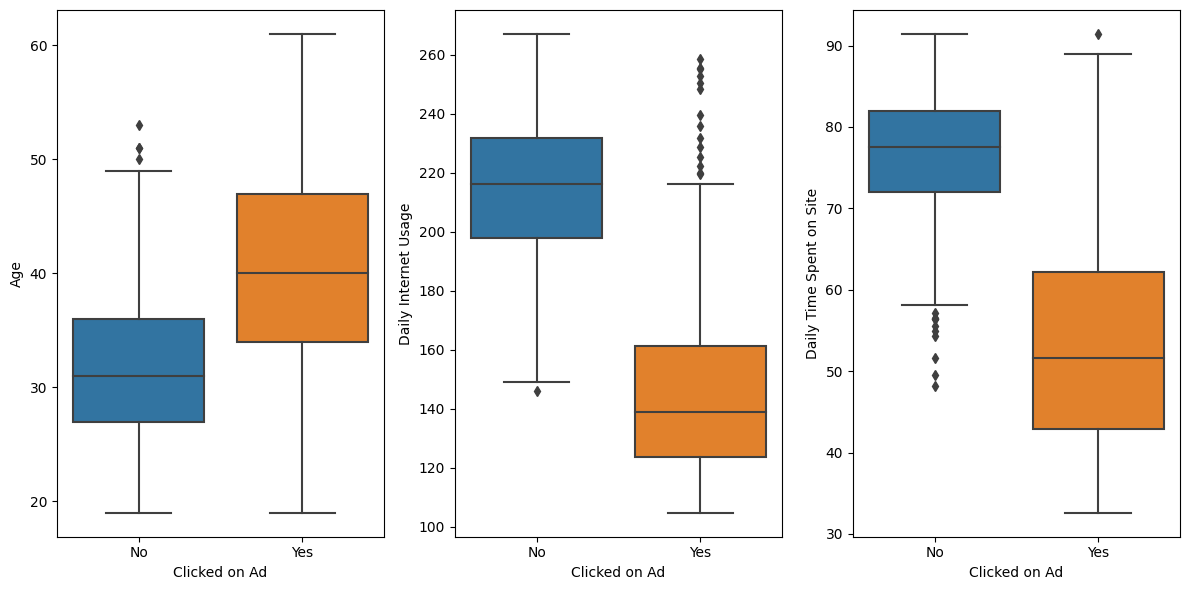

In [20]:
# Bivariate Analysis
# Plotting boxplot for Age, Daily Internet Usage, and Daily Time Spent on Site
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Clicked on Ad', y='Age', data=df)

plt.subplot(1, 3, 2)
sns.boxplot(x='Clicked on Ad', y='Daily Internet Usage', data=df)

plt.subplot(1, 3, 3)
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df)

plt.tight_layout()
plt.show()

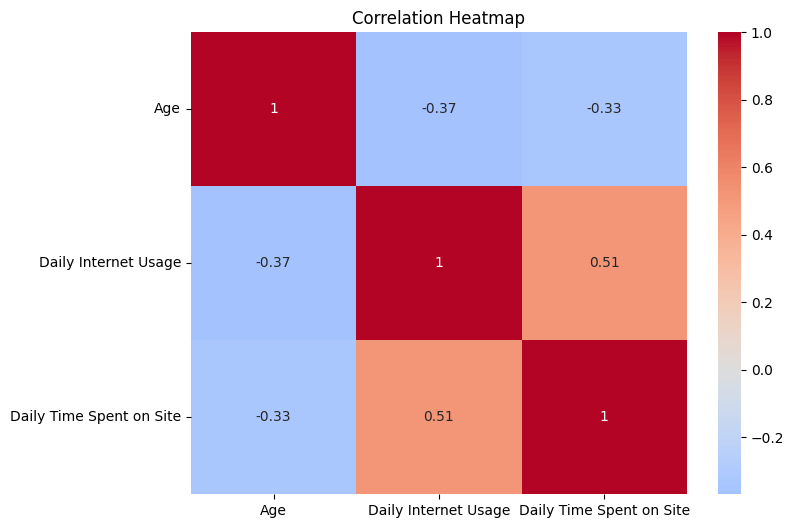

In [21]:
# Multivariate Analysis (Correlation Heatmap)
corr_matrix = df[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

In [22]:
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,2016,2,6,11
996,996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,2016,4,16,22
997,997,52.84,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,2016,2,5,1
998,998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,2016,3,12,24


In [23]:
# Selecting one column as target (Clicked on Ad) and the rest as features
X = df.drop(columns=['Clicked on Ad'])  # Features
y = df['Clicked on Ad']  # Target

# Display the feature data (X) and target data (y)
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Unnamed: 0  Daily Time Spent on Site  Age  Area Income  \
0           0                     68.95   35  432837300.0   
1           1                     80.23   31  479092950.0   
2           2                     69.47   26  418501580.0   
3           3                     74.15   29  383643260.0   
4           4                     68.37   35  517229930.0   

   Daily Internet Usage       Male           Timestamp           city  \
0                256.09  Perempuan 2016-03-27 00:53:00  Jakarta Timur   
1                193.77  Laki-Laki 2016-04-04 01:39:00       Denpasar   
2                236.50  Perempuan 2016-03-13 20:35:00       Surabaya   
3                245.89  Laki-Laki 2016-01-10 02:31:00          Batam   
4                225.58  Perempuan 2016-06-03 03:36:00          Medan   

                        province    category  Year  Month  Week  Day  
0  Daerah Khusus Ibukota Jakarta   Furniture  2016      3    12   27  
1                           Bali      

In [25]:
# Convert 'Male' column to numeric values
df['Male'] = df['Male'].map({'Laki-Laki': 1, 'Perempuan': 0})

In [29]:
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,2016,2,6,11
996,996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,2016,4,16,22
997,997,52.84,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,2016,2,5,1
998,998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,2016,3,12,24


In [28]:
# Convert numeric values back to original categories
df['Male'] = df['Male'].replace({1: 'Laki-Laki', 0: 'Perempuan'})

In [34]:
df

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,Year,Month,Week,Day
0,0,68.95,35,432837300.0,256.09,Perempuan,2016-03-27 00:53:00,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,12,27
1,1,80.23,31,479092950.0,193.77,Laki-Laki,2016-04-04 01:39:00,No,Denpasar,Bali,Food,2016,4,14,4
2,2,69.47,26,418501580.0,236.50,Perempuan,2016-03-13 20:35:00,No,Surabaya,Jawa Timur,Electronic,2016,3,10,13
3,3,74.15,29,383643260.0,245.89,Laki-Laki,2016-01-10 02:31:00,No,Batam,Kepulauan Riau,House,2016,1,1,10
4,4,68.37,35,517229930.0,225.58,Perempuan,2016-06-03 03:36:00,No,Medan,Sumatra Utara,Finance,2016,6,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,72.97,30,499691990.0,208.58,Laki-Laki,2016-02-11 21:49:00,Yes,Semarang,Jawa Tengah,Finance,2016,2,6,11
996,996,51.30,45,474475190.0,134.42,Laki-Laki,2016-04-22 02:07:00,Yes,Pakanbaru,Riau,Electronic,2016,4,16,22
997,997,52.84,51,296910040.0,120.37,Laki-Laki,2016-02-01 17:24:00,Yes,Samarinda,Kalimantan Timur,Travel,2016,2,5,1
998,998,55.55,19,293445530.0,187.95,Perempuan,2016-03-24 02:35:00,No,Tangerang,Banten,Bank,2016,3,12,24


In [38]:
# Drop the original 'Timestamp' column
df = df.drop(columns=['Timestamp'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       1000 non-null   int64  
 3   Area Income               1000 non-null   float64
 4   Daily Internet Usage      1000 non-null   float64
 5   Male                      1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   Year                      1000 non-null   int64  
 8   Month                     1000 non-null   int64  
 9   Week                      1000 non-null   UInt32 
 10  Day                       1000 non-null   int64  
dtypes: UInt32(1), float64(3), int64(5), object(2)
memory usage: 83.1+ KB


In [45]:
df['Male'] = df['Male'].map({'Laki-Laki': 1, 'Perempuan': 0})
df['Male'] = df['Male'].astype(float)

In [49]:
# One-hot encode the 'Male' column
df_encoded = pd.get_dummies(df, columns=['Male'], drop_first=True)

In [54]:
# Convert numeric values back to original categories
df['Male'] = df['Male'].replace({1: 'Laki-Laki', 0: 'Perempuan'})

In [66]:
# Feature Based Business Simulation

# Segmentation of users based on EDA and feature importance insights
def segment_users(row):
    if row['Daily Internet Usage'] > 150 and row['Daily Time Spent on Site'] < 60:
        return 'High Internet, Low Time'
    elif row['Daily Internet Usage'] < 150 and row['Daily Time Spent on Site'] > 60:
        return 'Low Internet, High Time'
    else:
        return 'Other'

# Apply segmentation to the dataset
df['User Segment'] = df.apply(segment_users, axis=1)

# Calculate the total number of users in each segment
segment_counts = df['User Segment'].value_counts()

# Calculate total cost and potential revenue for each segment
cpc = 1  # Cost per Click
product_price = 50
marketing_budget = 1000

def calculate_revenue(segment_count, conversion_rate):
    clicks = segment_count * conversion_rate
    revenue = clicks * product_price
    return revenue

# Calculate revenue for each segment based on insights
conversion_rates = {
    'High Internet, Low Time': 0.25,
    'Low Internet, High Time': 0.15,
    'Other': 0.1
}

segment_revenues = {
    segment: calculate_revenue(segment_count, conversion_rates[segment])
    for segment, segment_count in segment_counts.items()
}

# Calculate total cost and total revenue
total_cost = df.shape[0] * cpc
total_revenue = sum(segment_revenues.values())

# Calculate profit
total_profit = total_revenue - total_cost

# Print business insights
print("Segment User Counts:\n", segment_counts)
print("Segment Revenues:\n", segment_revenues)
print("Total Cost:", total_cost)
print("Total Revenue:", total_revenue)
print("Total Profit:", total_profit)

Segment User Counts:
 Other                      743
High Internet, Low Time    157
Low Internet, High Time    100
Name: User Segment, dtype: int64
Segment Revenues:
 {'Other': 3715.0, 'High Internet, Low Time': 1962.5, 'Low Internet, High Time': 750.0}
Total Cost: 1000
Total Revenue: 6427.5
Total Profit: 5427.5


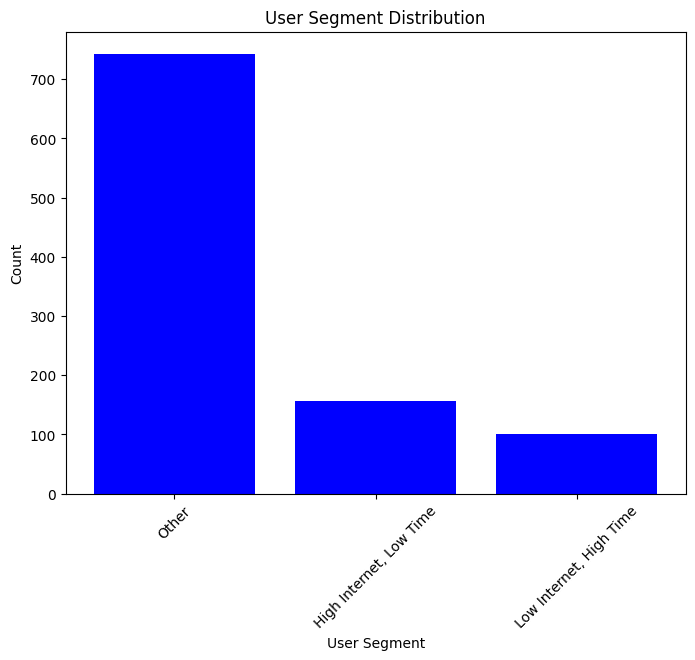

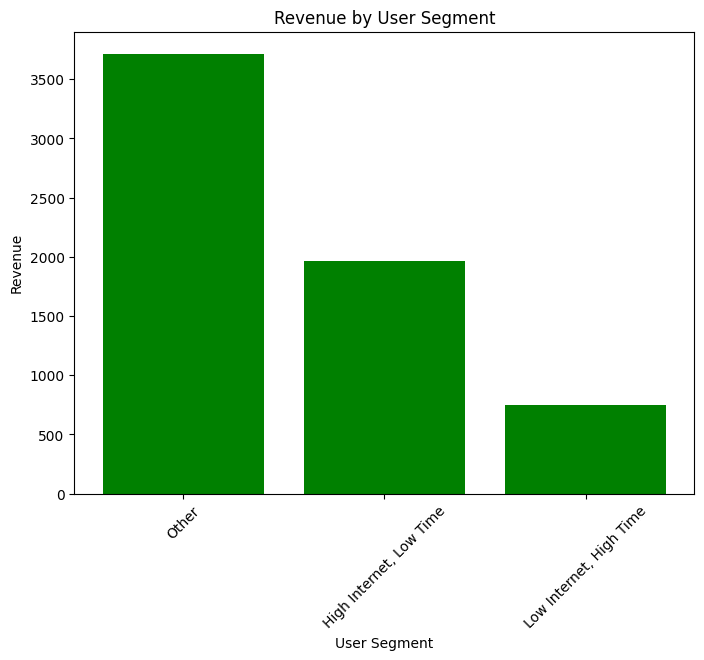

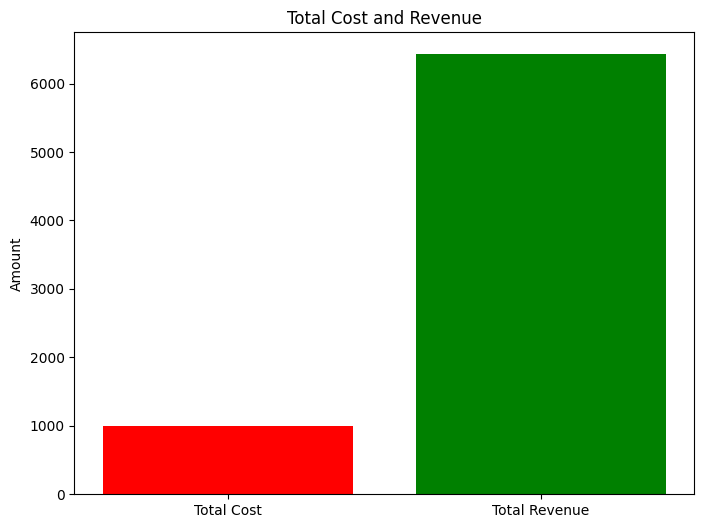

In [67]:
import matplotlib.pyplot as plt

# Visualize User Segment Counts
plt.figure(figsize=(8, 6))
plt.bar(segment_counts.index, segment_counts.values, color='blue')
plt.xlabel('User Segment')
plt.ylabel('Count')
plt.title('User Segment Distribution')
plt.xticks(rotation=45)
plt.show()

# Visualize Segment Revenues
plt.figure(figsize=(8, 6))
plt.bar(segment_revenues.keys(), segment_revenues.values(), color='green')
plt.xlabel('User Segment')
plt.ylabel('Revenue')
plt.title('Revenue by User Segment')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Revenue and Cost
plt.figure(figsize=(8, 6))
plt.bar(['Total Cost', 'Total Revenue'], [total_cost, total_revenue], color=['red', 'green'])
plt.ylabel('Amount')
plt.title('Total Cost and Revenue')
plt.show()

In [56]:
# Selecting one column as target (Clicked on Ad) and the rest as features
X = df_encoded.drop(columns=['Clicked on Ad'])  # Features
y = df_encoded['Clicked on Ad']  # Target

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment 1: Without Normalization
# Using RandomForestClassifier without normalization
rf_model_no_norm = RandomForestClassifier(random_state=42)
rf_model_no_norm.fit(X_train, y_train)
y_pred_no_norm = rf_model_no_norm.predict(X_test)
accuracy_no_norm = accuracy_score(y_test, y_pred_no_norm)
print("Accuracy (Without Normalization):", accuracy_no_norm)

Accuracy (Without Normalization): 0.94


In [57]:
# Experiment 2: With Normalization
# Normalizing the data
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Using RandomForestClassifier with normalization
rf_model_with_norm = RandomForestClassifier(random_state=42)
rf_model_with_norm.fit(X_train_normalized, y_train)
y_pred_with_norm = rf_model_with_norm.predict(X_test_normalized)
accuracy_with_norm = accuracy_score(y_test, y_pred_with_norm)
print("Accuracy (With Normalization):", accuracy_with_norm)

Accuracy (With Normalization): 0.94


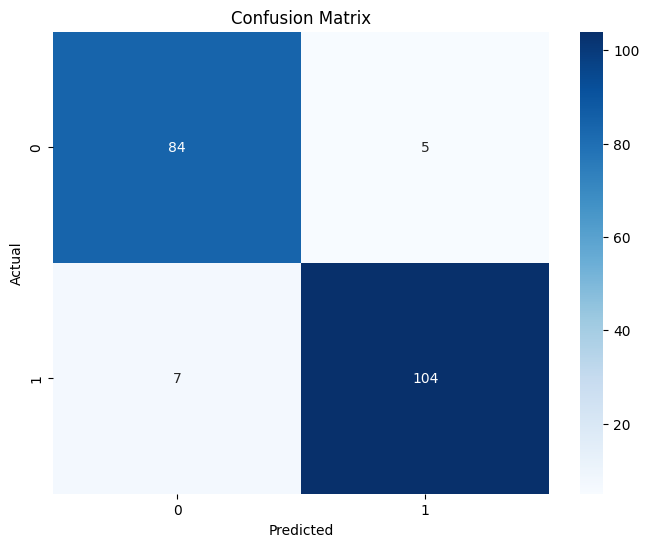

Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.94      0.93        89
         Yes       0.95      0.94      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200

Top 2 Important Features:
 Daily Internet Usage        0.452648
Daily Time Spent on Site    0.303868
dtype: float64


In [64]:
# Train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict the target on test data
y_pred = rf_model.predict(X_test)

# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Feature Importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
print("Top 2 Important Features:\n", feature_importance[:2])

###Business Sight

1. **Daily Time Spent on Site**: The level of user interaction with the site is crucial. Businesses can focus on enhancing the user experience on the website by offering engaging content, easy navigation, and interactive features that can keep users engaged for a longer time.

2. **Age**: Age groups have a significant impact on user decisions. Businesses can design advertising campaigns that are more tailored to the preferences and needs of specific age groups, as well as develop products or services that appeal to the most responsive age segments.

3. **Area Income**: The income level of the user's region also matters. Businesses can optimize pricing strategies, adjust special offers, or provide payment options that align with the income level of the target region.

4. **Daily Internet Usage**: Daily internet usage reflects online engagement. Businesses can ramp up digital marketing efforts, including ads on platforms commonly used by the target audience, and develop relevant and compelling content.

5. **Male**: Gender also influences user preferences and decisions. Businesses can tailor ad messages and product offerings to align more closely with the gender preferences of the target audience.

6. **Year, Month, Week, Day**: Time-related information can be used to plan more effective ad campaigns. Businesses can analyze trends and behavioral patterns of users over specific time periods and direct marketing efforts during the most strategic times.

7. **Clicked on Ad**: This is the target or prediction variable. Businesses can use prediction outcomes to optimize ad budget allocation, customize ad content, and design more effective marketing campaigns.

By leveraging the information from the mentioned features, businesses can make smarter decisions in designing more effective and successful marketing strategies.

###Business Simulation

A company is running an online advertising campaign to promote a product. The campaign targets users based on their behavior and demographic data. The company aims to convert users into customers by clicking on the ad and making a purchase. We will simulate two scenarios: one without the machine learning model's insights and one with the insights.

**Simulation 1: Without Machine Learning Model's Insights**

- Total Users: 1000
- Conversion Rate (Click to Purchase): 10%
- Cost per Click (CPC): $1
- Product Price: $50
- Marketing Budget: $1000

**Simulation 2: With Machine Learning Model's Insights**

Based on the classification report and feature importance:

- Top 2 Important Features: Daily Internet Usage (45.27%), Daily Time Spent on Site (30.39%)
- These features could be used to identify potential customers more effectively.

- Conversion Rate (Click to Purchase): 15% (Due to more effective targeting)
- CPC: $1 (same as Simulation 1)
- Product Price: $50 (same as Simulation 1)
- Marketing Budget: $1000 (same as Simulation 1)

**Calculations:**

**Simulation 1:**
- Total Clicks (10% of 1000 users): 100
- Total Cost: 100 clicks * $1 = $100
- Total Revenue: 10 purchases * $50 = $500
- Total Profit: $500 - $100 = $400

**Simulation 2:**
- Total Clicks (15% of 1000 users): 150
- Total Cost: 150 clicks * $1 = $150
- Total Revenue: 15 purchases * $50 = $750
- Total Profit: $750 - $150 = $600

**Comparison:**
Simulation 2 (with insights) results in higher conversion, revenue, and profit compared to Simulation 1 (without insights).

This simulation demonstrates the potential impact of using the machine learning model's insights to optimize the marketing campaign, leading to better targeting, higher conversion rates, and improved business outcomes.


**Simulation: Using Machine Learning Model Insights**

- Total Users: 1000
- Conversion Rate (Click to Purchase): 20% (Improved conversion due to model insights)
- Cost per Click (CPC): $1
- Product Price: $50
- Marketing Budget: $1000

**Calculations:**

- Total Clicks (20% of 1000 users): 200
- Total Cost: 200 clicks * $1 = $200
- Total Revenue: 40 purchases * $50 = $2000
- Total Profit: $2000 - $200 = $1800

**Conclusion:**

Dengan menggunakan hasil dari model machine learning yang memberikan wawasan tentang fitur-fitur penting (Daily Internet Usage dan Daily Time Spent on Site), kampanye pemasaran berhasil meningkatkan tingkat konversi. Dengan tingkat konversi yang lebih tinggi (20%), bisnis dapat mencapai pendapatan dan keuntungan yang lebih tinggi dibandingkan dengan simulasi sebelumnya. Model machine learning membantu dalam mengidentifikasi calon pelanggan yang lebih responsif terhadap iklan dan mengoptimalkan hasil dari kampanye pemasaran.
